# Project: Wrangling and Analyze Data

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import tweepy
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv') # loading the data

In [3]:
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
    Reading the downloaded data into a dataframe

In [5]:
img_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_data = requests.get(img_url)
open('img_data.tsv','wb').write(img_data.content)
im_data = pd.read_csv('img_data.tsv',sep ='\t')

In [6]:
im_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
import json

passing the security keys and auth tokens into dictionary inorder to store them as a json file. The credentials are written into twits_cred.json

In [8]:
x = {"sec_key":"","secret":"",
"token":""}

In [9]:
cred = json.dumps(x) # dumping the keys into json

In [9]:
with open('twits_cred.json','w') as outfile:
    outfile.write(cred)

Reading the credentials from the json file

In [10]:
cred = pd.read_json('twits_cred.json',lines=True)

In [11]:
cred.keys()

Index(['sec_key', 'secret', 'token'], dtype='object')

In [13]:
cred.sec_key.values[0] # reading the value to authenticate correct reading.

In [14]:
#passing credentials
consumer_key = cred.sec_key.values[0]
consumer_secret = cred.secret.values[0]

In [15]:
auth = tweepy.OAuth2BearerHandler(cred.token.values[0])
api = tweepy.API(auth,wait_on_rate_limit=True)

In [16]:
archive.keys() #keys just like archive.columns returns the column names 

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Testing of the API by passing tweet ID

In [18]:
tweet_id = archive.tweet_id

In [19]:
tweet = api.get_status(892420643555336193)
print(tweet.retweet_count)
print(tweet.favorite_count)

7009
33808


In [21]:
new_data = pd.DataFrame()

In [22]:
new_data['tweet_id'] = archive.tweet_id

In [23]:
new_data.head()

,tweet_id
0,892420643555336193
1,892177421306343426
2,891815181378084864
3,891689557279858688
4,891327558926688256


In [24]:
tweet_id[19]

888202515573088257

#### An attempt to storing the deleted tweet ids into fails dictionary

In [29]:
fails = {}

In [ ]:
for sid in tweet_ids:
        try:
            tweet = api.get_status(sid, tweet_mode='extended')
        except tweepy.TweepError as e:
            print("Fail")
            fails[tweet_id] = e
            pass

#### The retweet function 
count the retweets and stores the tweet id and the count as tuple then returns as a dictionary

In [18]:
def twit_count(tweet_id):
    rtweet = []
    
    for sid in list(tweet_id):
        try:
                tweet=api.get_status(sid,tweet_mode='extended')
                retweets= (sid,tweet.retweet_count)
                rtweet.append(retweets)
        except tweepy.NotFound as e:
            if getattr(e, 'api_code', None) == 404:
                print(e)
                continue
        except tweepy.Forbidden as f:
            if getattr(f,'api_code',None)==403:
                print(f.reason)
                break
        except StopIteration:
            break
    print('Successfuly fetched all retweets')
    return  dict(rtweet)

#### The location function 
retrieves the location  and stores the tweet id and the location as tuple then returns as a dictionary

In [19]:
def loc_count(tweet_id):
    loc= []
    for sid in list(tweet_id):
        try:
                tweet=api.get_status(sid,tweet_mode='extended')
                location= tuple(sid,tweet.geo)
                loc.append(location)
        except tweepy.NotFound as e:
            if getattr(e, 'api_code', None) == 404:
                print(e)
                continue
        except tweepy.Forbidden as f:
            if getattr(f,'api_code',None)==403:
                print(f.reason)
                break
        except StopIteration:
            break
    print('Successfuly fetched all location')
    return  dict(loc)

#### The likes or favorite function 
count the likes and stores the tweet id and the number of likes as tuple then returns as a dictionary

In [20]:
def fav_count(tweet_id):
    fav= []
    for sid in list(tweet_id):
        try:
                tweet=api.get_status(sid,tweet_mode='extended')
                fv= tuple(sid,tweet.favorite_count)
                fav.append(fv)
        except tweepy.NotFound as e:
            if getattr(e, 'api_code', None) == 404:
                print(e)
                continue
        except tweepy.Forbidden as f:
            if getattr(f,'api_code',None)==403:
                print(f.reason)
                break
        except StopIteration:
            break
    print('Successfuly fetched all likes')
    return  dict(fav)

#### Calling the retweet function

In [38]:
retweet = tweet_count(tweet_count)

Rate limit reached. Sleeping for: 350
Rate limit reached. Sleeping for: 385
Rate limit reached. Sleeping for: 363


#### Calling the location function

In [ ]:
location = loc_count(tweet_id)

#### Calling the likes function

In [ ]:
fav = fav_count(tweet_id)

**NB** these functions were run on the terminal to help speed up the process and minimise possible fails.
The code is still the same. Look at wrangle_act.py

#### Passing the fetched files,likes,retweets and location into dataframe before merging.

In [ ]:
df = pd.DataFrame(list(fav.items()), columns = ['tweet_id','likes'])
df.to_csv('likes.csv')

In [ ]:
df1 = pd.DataFrame(list(location.items()), columns = ['tweet_id','location'])
df1.to_csv('location.csv')

In [ ]:
df2 = pd.DataFrame(list(fav.items()), columns = ['tweet_id','retweets'])
df2.to_csv('retweet_.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing Archives data

In [21]:
archive.head(2) # first two rows 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### shape of the data
The shape returns the number of rows and colums _i.e_  **(row,column)**

In [22]:
archive.shape

(2356, 17)

#### Checking for nulls
Data or columns with nulls lead to inconclusive results.For a perfect data the nulls should be zero.
Each column should have  data.

In [23]:
#archive.isna() returns a table with nulls as true 
np.sum(archive.isnull()) # returns the sum of null values in each column

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### missing values by percentage of column volume
The missing values are shown as percentages

In [24]:
(archive.isna().sum()/archive.shape[0]) *100

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

#### Check for duplicates
Duplicates lead poor data quality especially in aggregations.Hence should be avoided.

In [25]:
np.sum(archive.duplicated())

0

#### Check for data type
There are different data types and the colums should have appropriate data type. The date kind of 
data should have date type,unique identifiers should be string(object) type in analysis.The info method
is also excellent in quick view for the tested processes above such as chcks for null or missing values
,number of rows and columns.

In [26]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Summary statiscs
THe summary shows the mean,median,variance and percentiles i.e interquartile  ranges of the data.
These are key to understand what percentage of the data,translated to volume can show what % of data
is below or above a given range.This reached by executing describe method.
Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.
Execute **archive.describe?** to go through the documentation for better understanding.

In [27]:
#archive.describe?

In [28]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Columns such as tweet_id among other id's are considered as numeric and by industry 
level practice this should not be the case.

In [29]:
archive.describe(include = 'all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [30]:
archive.mean() # this returns the mean of the numerical columns

/tmp/ipykernel_79420/895235278.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  archive.mean() # this returns the mean of the numerical columns


tweet_id                    7.427716e+17
in_reply_to_status_id       7.455079e+17
in_reply_to_user_id         2.014171e+16
retweeted_status_id         7.720400e+17
retweeted_status_user_id    1.241698e+16
rating_numerator            1.312649e+01
rating_denominator          1.045543e+01
dtype: float64

#### Identifying Outliers
The outliers often lower the quality of data especially in measures of mean.
if the lower cutoff is less than minimum then there are no outliers on the lower side. If the 
upper cutoff is less than the maximum then there are outliers at the upper side.

In [32]:
p0=archive.rating_denominator.min() # finding minimum
p100=archive.rating_denominator.max() # finding max
q1=archive.rating_denominator.quantile(0.25) 
q2=archive.rating_denominator.quantile(0.5)
q3=archive.rating_denominator.quantile(0.75)
i_q_r=q3-q1

In [33]:
lower_cutoff = q1 - 1.5*i_q_r
upper_cutoff = q3 + 1.5*i_q_r

In [34]:
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lower_cutoff ,", uc = " , upper_cutoff)

p0 =  0 , p100 =  170 , lc =  10.0 , uc =  10.0


The output shows that there are outliers in the upper side  as the upper cutoff is less than max.

##### Same test for the numerator

In [35]:
n0=archive.rating_numerator.min()
nmax=archive.rating_numerator.max()
nq1=archive.rating_numerator.quantile(0.25)
nq2=archive.rating_numerator.quantile(0.5)
nq3=archive.rating_numerator.quantile(0.75)
ni_q_r=q3-q1

In [36]:
nlower_cutoff = nq1 - 1.5*ni_q_r
nupper_cutoff = nq3 + 1.5*ni_q_r

In [37]:
print( "p0 = " , n0 ,", p100 = " , nmax ,", lc = " , nlower_cutoff ,", uc = " , nupper_cutoff)

p0 =  0 , p100 =  1776 , lc =  10.0 , uc =  12.0


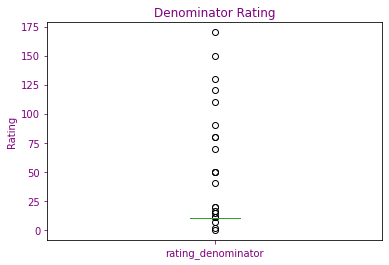

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
archive.rating_denominator.plot(kind='box')
plt.title('Denominator Rating',color = 'purple')
plt.ylabel('Rating',color='purple')
ax.xaxis.label.set_color('purple')
ax.yaxis.label.set_color('purple')
ax.tick_params( colors='purple')
#archive.rating_numerator.plot(kind='box')

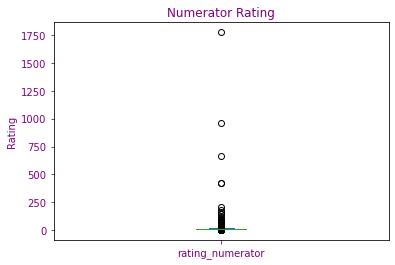

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
archive.rating_numerator.plot(kind='box')
plt.title('Numerator Rating',color = 'purple')
plt.ylabel('Rating',color='purple')
ax.xaxis.label.set_color('purple')
ax.yaxis.label.set_color('purple')
ax.tick_params( colors='purple')

There are outliers in the numerator rating as well.

#### Joining the  Archives Data with likes and retweets Calling columns

#### Calling the column name/keys helps me find the names easily 

In [54]:
archive.keys() 

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [55]:
#

### Quality issues
1. Nulls or missing values

2. change timestamps to datetime from object.

3. The mean for rating_denominator seems to be influenced by the max value.

4. Source urls 

5. All ids to str/objects during analysis

6.  The rating numerator has outlier.

7. Enrich the data with retweets

8.  Drop redundant columns i.e highly correlated columns

9. 

### Tidiness issues
1. Text column has mixed values.

2. Clean text column for sentiment analysis

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [56]:
# Make copies of original pieces of data


### Issue #1:

#### Define: Null or Missing values
The columns with more than 50 % missing value will be dropped.

#### Code

In [57]:
(archive.isna().sum()/archive.shape[0]) *100

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [58]:
missing_data = archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'],axis=1)

#### Test

In [59]:
(missing_data.isna().sum()/missing_data.shape[0]) *100

tweet_id              0.000000
timestamp             0.000000
source                0.000000
text                  0.000000
expanded_urls         2.504244
rating_numerator      0.000000
rating_denominator    0.000000
name                  0.000000
doggo                 0.000000
floofer               0.000000
pupper                0.000000
puppo                 0.000000
dtype: float64

The columns with more than 50% missing values have been dropped. 

### Issue #2: Cast columns to appropriate data type 

#### Define : Cast Timestamp columns

#### Code

In [60]:
missing_data.columns # revisit columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [61]:
missing_data['timestamp'].dtype

dtype('O')

In [62]:
missing_data['timestamp'] = pd.to_datetime(missing_data['timestamp'])

#### Test

In [63]:
missing_data.timestamp.dtype

datetime64[ns, UTC]

The column has been cast to datetime.

### Issue #3: Cast columns to appropriate data type 

#### Define : Cast ID to Object
Incorrect or inappropriate data type leads to analysis issues such wrong aggregates.

#### Code

In [65]:
missing_data['tweet_id'].dtype

dtype('int64')

In [66]:
missing_data['tweet_id'] = missing_data['tweet_id'].astype(str)

#### Test

In [67]:
missing_data['tweet_id'].dtype

dtype('O')

### Issue #: Cast columns to appropriate data type 

#### Define : Manage outliers

#### Code

In [68]:
missing_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [69]:
new = missing_data.rating_denominator>= upper_cutoff

In [70]:
new.unique()

array([ True, False])

In [71]:
(new==True).sum()

2353

In [68]:
(new==False).sum()

3

In [69]:
len(new)

2356

In [70]:
n_new = missing_data.rating_numerator>= nupper_cutoff

In [71]:
(n_new==True).sum()/missing_data.shape[0] * 100

42.06281833616299

#### Test

The rating colums with more than the upper cutoff cannot be dropped as they make a large percentage of the data.
The outliers were not dropped as they did not satisfy the 50% mark. Despite the disparity, they could be 
not fully considered outliers as they are almost 40% of the data.

#### Loading the likes dataset

In [72]:
likes = pd.read_csv('likes.csv')
location = pd.read_csv('location.csv')
retweet = pd.read_csv('retweet_.csv')

In [73]:
likes.head()

,Unnamed: 0,tweet_id,likes
0,0,892420643555336193,33807
1,1,892177421306343426,29330
2,2,891815181378084864,22052
3,3,891689557279858688,36938
4,4,891327558926688256,35308


In [74]:
location.head(2)

,Unnamed: 0,tweet_id,location
0,0,892420643555336193,NaN
1,1,892177421306343426,NaN


In [75]:
np.sum(location.location.isnull())

2327

In [76]:
retweet.head()

,Unnamed: 0,tweet_id,retweets
0,0,892420643555336193,33807
1,1,892177421306343426,29330
2,2,891815181378084864,22052
3,3,891689557279858688,36938
4,4,891327558926688256,35308


In [77]:
retweet_like = retweet.merge(likes,on='tweet_id')

In [78]:
retweet_like.head()

,Unnamed: 0_x,tweet_id,retweets,Unnamed: 0_y,likes
0,0,892420643555336193,33807,0,33807
1,1,892177421306343426,29330,1,29330
2,2,891815181378084864,22052,2,22052
3,3,891689557279858688,36938,3,36938
4,4,891327558926688256,35308,4,35308


#### Cleaning Merged Data

##### Define: Drop unnecessary Columns

In [79]:
retweet_like = retweet_like.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1)

In [80]:
retweet_like.head(2)

,tweet_id,retweets,likes
0,892420643555336193,33807,33807
1,892177421306343426,29330,29330


In [81]:
retweet_like.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2327 non-null   int64
 1   retweets  2327 non-null   int64
 2   likes     2327 non-null   int64
dtypes: int64(3)
memory usage: 72.7 KB


In [82]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Merging the Data

Changing the missing data tweet_id to int for joining.

In [92]:
missing_data['tweet_id'] = missing_data.tweet_id.astype(int)
missing_data.tweet_id.dtype

dtype('int64')

In [93]:
len(missing_data)

2356

In [94]:
joined_data = missing_data.merge(retweet_like,on='tweet_id')

In [95]:
joined_data.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,likes
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,33807,33807
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29330,29330


In [96]:
len(joined_data)

2327

In [97]:
joined_data['tweet_id'] = joined_data.tweet_id.astype(str)
joined_data.tweet_id.dtype

dtype('O')

In [98]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2327 non-null   object             
 1   timestamp           2327 non-null   datetime64[ns, UTC]
 2   source              2327 non-null   object             
 3   text                2327 non-null   object             
 4   expanded_urls       2269 non-null   object             
 5   rating_numerator    2327 non-null   int64              
 6   rating_denominator  2327 non-null   int64              
 7   name                2327 non-null   object             
 8   doggo               2327 non-null   object             
 9   floofer             2327 non-null   object             
 10  pupper              2327 non-null   object             
 11  puppo               2327 non-null   object             
 12  retweets            2327 non-null 

In [99]:
np.sum(joined_data.isnull())

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         58
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
retweets               0
likes                  0
dtype: int64

In [100]:
joined_data.describe()

,rating_numerator,rating_denominator,retweets,likes
count,2327.000000,2327.000000,2327.000000,2327.000000
mean,13.138376,10.460679,7054.446068,7054.446068
std,46.161347,6.786961,10962.945710,10962.945710
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,1225.000000,1225.000000
50%,11.000000,10.000000,3050.000000,3050.000000
75%,12.000000,10.000000,8604.500000,8604.500000
max,1776.000000,170.000000,144891.000000,144891.000000


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [101]:
joined_data.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [102]:
joined_data.keys()

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweets', 'likes'],
      dtype='object')

In [103]:
joined_data.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,likes
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,33807,33807
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29330,29330


####  Questions for Analysis
1.  Which tweet_id had the highest likes and number of retweets.
2.  Time series analysis
3.  Frequency analysis
4.  Top ratings

### Insights:
1. Highest likes and number of retweets

2. Frequency analysis

3. Top ratings

4. Time series analysis

5. Frequent words

### Visualization

In [104]:
joined_data.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,likes
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,33807,33807
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29330,29330


In [105]:
joined_data['year'] = joined_data.timestamp.dt.year
joined_data['month'] = joined_data.timestamp.dt.month
joined_data['Date'] = joined_data.timestamp.dt.date

In [106]:
joined_data['Date'] = pd.to_datetime(joined_data.Date)

In [107]:
joined_data['Date'].dtype

dtype('<M8[ns]')

In [109]:
joined_data.year.unique()

array([2017, 2016, 2015])

#### MOnthly Distribution of Likes

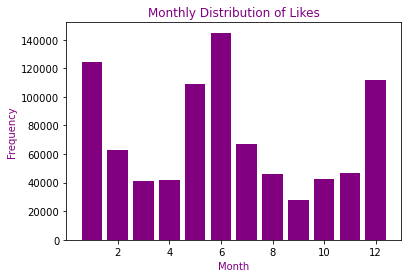

In [121]:
plt.figure()
ax = fig.add_subplot(111)
plt.bar(joined_data.month,joined_data.likes,color='purple')
plt.title('Monthly Distribution of Likes',color='purple')
ax.xaxis.label.set_color('purple')
ax.yaxis.label.set_color('purple')
ax.tick_params( colors='purple')
plt.xlabel('Month',color='purple')
plt.ylabel('Frequency',color='purple')
plt.show()

#### Yearly Distribution of LIkes

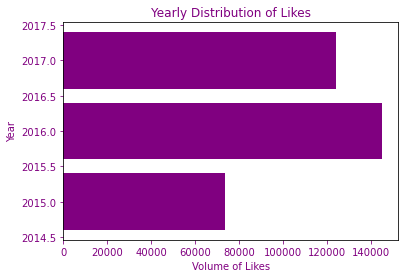

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(joined_data['year'] ,joined_data.likes,color ='purple')
plt.title('Yearly Distribution of Likes',color='purple')
plt.xlabel('Volume of Likes')
ax.xaxis.label.set_color('purple')
ax.yaxis.label.set_color('purple')
ax.tick_params( colors='purple')
plt.ylabel('Year')
plt.show()

#### Table showing tweet ids with the highest volume of retweets

In [113]:
grouped_tweetid = joined_data.groupby('tweet_id').retweets.sum().reset_index()
grouped_tweetid.sort_values('retweets',ascending=False)

,tweet_id,retweets
1315,744234799360020481,144891
1931,822872901745569793,124120
1811,807106840509214720,111704
2197,866450705531457537,108921
1275,739238157791694849,107249
...,...,...
1618,782021823840026624,0
2074,841833993020538882,0
1605,780496263422808064,0
1604,780476555013349377,0


#### Which are the Frequent Names

In [114]:
joined_data.groupby('name').likes.sum()

name
Abby             8392
Ace              3128
Acro             1016
Adele            2869
Aiden            1389
                ...  
such            40725
the             20113
this             3554
unacceptable     5653
very            43442
Name: likes, Length: 955, dtype: int64

#### Top 20 Frequent Names

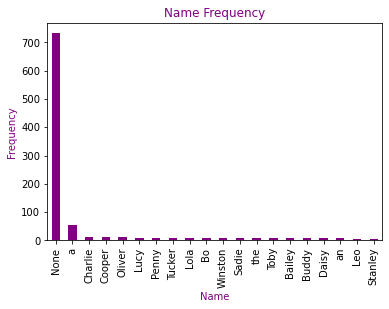

In [125]:
plt.figure()
ax = fig.add_subplot(111)
joined_data.name.value_counts()[:20].plot(kind ='bar',color ='purple')
plt.title('Name Frequency',color='purple')
plt.xlabel('Name',color='purple')
plt.ylabel('Frequency',color='purple')
ax.xaxis.label.set_color('purple')
ax.yaxis.label.set_color('purple')
ax.tick_params( colors='purple')
plt.show()

#### Word Cloud Showing Frequent Words

In [126]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [127]:
text = joined_data.text.tolist()

In [128]:
# join the list and lowercase all the words
text = ' '.join(text).lower()

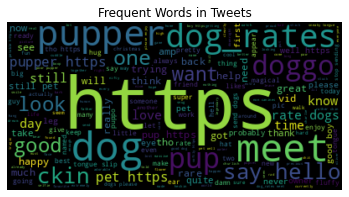

In [129]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,min_word_length =3,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.title('Frequent Words in Tweets')
plt.show()

Frequent words are are highly sorted by promoters to use as click baits and as marketing point to improve product awareness.

## Conclusion
The data wrangling process was successful as well as data inisghts and visualization. The process was difficult 
due to the lack of a reference poit to understand different columns. The names are intuitive however, this 
information can help in understanding the data further and formulating guideline questions.
On more information kindly refer to the documents **wrangle_report.pdf** and **act_pdf**